In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams.update({'font.size': 18})

from definitions import ROOT_DIR
from nsrl.helper.data import DataSet

In [19]:
root_save_path = os.path.join(ROOT_DIR, "experiments", "maze", "runs")
experiment_dir = os.path.join(root_save_path, 'simple maze novelty reward with d step q planning_2019-07-12 17-02-38_1682112')

to_print = [100, 200, 300, 500, 1000]

dataset_fname = os.path.join(experiment_dir, f'dataset.epoch={to_print[-1]}.pkl')
dataset = DataSet.load(dataset_fname)

In [20]:
all_observations = dataset.observations()[0]
input_size = dataset._environment.inputDimensions()[0]
trajectory = dataset._environment._trajectory
borders = dataset._environment._map == 1
trajectory_by_inds = {n: np.zeros(input_size[1:]) + borders for n in to_print}
for i in trajectory_by_inds.keys():
    for pos_y, pos_x in trajectory[:i]:
        trajectory_by_inds[i][pos_y, pos_x] += 1

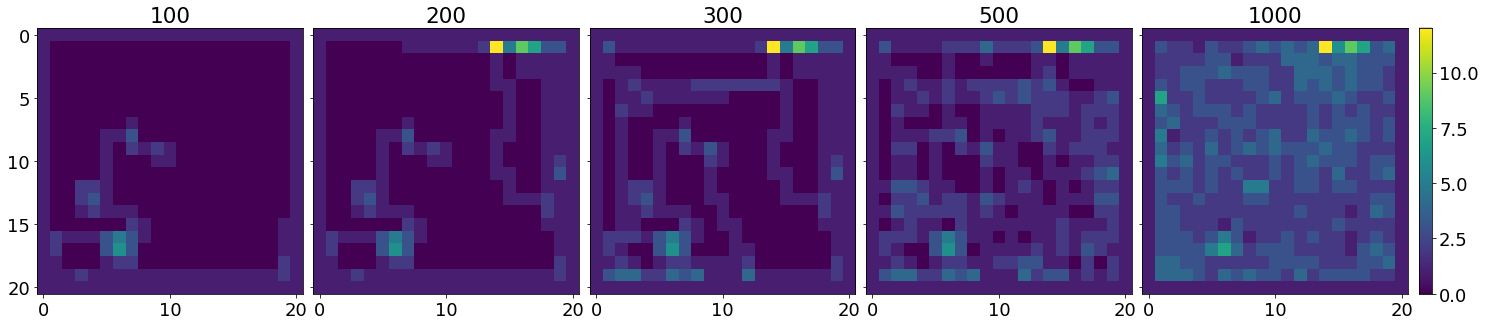

In [21]:
fig = plt.figure(figsize=(25,12))

grid = AxesGrid(fig, 111,
                nrows_ncols=(1, len(to_print)),
                axes_pad=0.15,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single")

for (n, val), ax in zip(trajectory_by_inds.items(),grid):
    ax.title.set_text(str(n))
    im = ax.imshow(val, vmin=0, vmax=12)

grid.cbar_axes[0].colorbar(im)

# for cax in grid.cbar_axes:
#     cax.toggle_label(False)


In [12]:
current_max = 0
for v in trajectory_by_inds.values():
    print(np.max(v))

6.0
12.0
12.0
12.0
